## Hypothesis Testing

To answer questions, we need to break down a question into a hypothesis. Then we collect data to justify which hypothesis is likely to be true.

An example of this would be whether chocolate or vanilla is a more favored ice cream flavor.

Hypothesis testing and confidence intervals allow for the use of **sample data** to draw conclusions about **an entire population**.

### Setting Up Hypothesis Tests
- H0 is true before we collect data
- H0 usually states there is no effect or that two groups are equal
- The H0 and H1 are competing, non-overlapping hypotheses 
- H1 is what we would like to prove to be true 
- H0 holds some sort of equals sign: `=`, `<=`, `>=`
- H1 holds the opposite sign: `!=`, `<`, `>`

#### Example:
"Innocent until proven guilty" suggests the following hypotheses are true:

- H0: Innocent
- H1: Guilty

### Types of Errors
In the judicial example, we have four possibilities considering the truth of the matter (whether someone is guilty or not) and the jury's decision (whether they considered someone guilty or not):

1. Truth: Guilty, Decision: Guilty *(No Error)*
2. Truth: Innocent, Decision: Guilty *(Type I Error)*
3. Truth: Guilty, Decision: Innocent *(Type II Error)*
4. Truth: Innocent, Decision: Innocent  *(No Error)*

A Type I Error is when the alternative is chosen, but the null is actually true. Also known as a False Positive, they are  denoted by the symbol α or alpha. They are considered the worst of the two possible errors. 

A Type II Error is when the null hypothesis is chosen, but the alternative hypothesis is actually true. Also known as a False Negative, they are denoted by the symbol β or beta.

#### Parachute Example
This example lets you see one of the most extreme cases of errors that might be committed in hypothesis testing. In a type I error, an individual died. In a type II error, you lost 30 dollars.

Usually in hypothesis testing, you choose a type I error threshold, and your hypothesis tests will be created to minimize the type II errors after ensuring the type I error rate is met.

### Common Types of Hypothesis Tests
Hypothesis tests are always performed on **population parameters**, never on statistics. Statistics are values we already have from the data, so it does not make sense to perform hypothesis tests on these values.

Common hypothesis tests include:

- Testing a population mean [(One sample t-test)](http://sites.utexas.edu/sos/guided/inferential/numeric/claim/one-sample-t/)
- Testing the difference in means [(Two-sample t-test)](https://www.isixsigma.com/tools-templates/hypothesis-testing/making-sense-two-sample-t-test/)
- Testing the difference before and after some treatment on the same individual [(Paired t-test)](http://www.statstutor.ac.uk/resources/uploaded/paired-t-test.pdf)
- Testing a population proportion [(One sample z-test)](https://stats.libretexts.org/Bookshelves/Applied_Statistics/Book%3A_Learning_Statistics_with_R_-_A_tutorial_for_Psychology_Students_and_other_Beginners_(Navarro)/13%3A_Comparing_Two_Means/13.01%3A_The_one-sample_z-test)
- Testing the difference between population proportions [(Two sample z-test)](https://cran.r-project.org/web/packages/distributions3/vignettes/two-sample-z-test.html)

You can use one of these sites to provide a t-table or z-table to support one of the above approaches:

- [t-table](https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg)
- [t-table or z-table](http://www.z-table.com/t-value-table.html)

There are literally hundreds of different hypothesis tests! However, instead of memorizing how to perform all of these tests, you can find the statistic(s) that best estimates the parameter(s) you want to estimate. You can bootstrap to simulate the sampling distribution. Then you can use your sampling distribution to assist in choosing the appropriate hypothesis.

### Methods for Choosing Between Hypotheses
1. Bootstrapping: we simulate the sampling distribution of our statistic and then we can see if our hypothesis is consistent with what we observe in the sampling distribution 
2. Simulating from the Null: Simulating what we believe to be possible under the null and then seeing if our data is actually consistent with that. In other others, we could simulate a sampling distribution from the null hypothesis using characteristics that would be true if our data came from the null. This is what professionals tend to do in a hypothesis test. 

#### Quiz: Hypothesis Testing Using Bootstraping
$ H_{0}: \mu \leqslant 70 $

$ H_{1}: \mu > 70 $

Consider $\mu$ as the average height of all individuals in the dataset. Both coffee drinks and non-coffee drinkers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

df = pd.read_csv('support-files/12_Hypothesis-Testing/coffee_dataset.csv')
df.head(1)

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179


In [2]:
# create a sample from data
sample_df = df.sample(150)

In [3]:
# create bootstrap sample
bootsample = sample_df.sample(150, replace=True)

In [4]:
means = []

for _ in range(int(1e4)):
    bootsample = sample_df.sample(150, replace=True)
    means.append(bootsample['height'].mean())

In [5]:
low, high = np.percentile(means, 2.5), np.percentile(means, 97.5)
low, high

(67.10258508046547, 68.15617490636113)

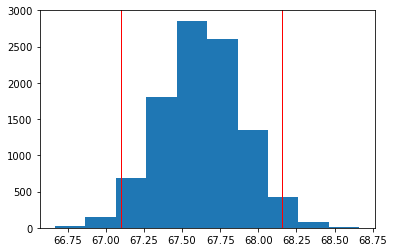

In [6]:
plt.hist(means)
plt.axvline(x=low, color='r', linewidth=1)
plt.axvline(x=high, color='r', linewidth=1);

Since the interval was entirely below 70, it suggests the null hypothesis ($H_{0}$) is actually true. 

#### Quiz: Simulating from the Null 
$ H_{0}: \mu \leqslant 70 $

$ H_{1}: \mu > 70 $

Consider $\mu$ as the average height of all individuals in the dataset. Both coffee drinks and non-coffee drinkers

In [7]:
# create a sample from our data
sample_df = df.sample(150)

In [8]:
# create a bootstrap sample
bootsample = sample_df.sample(150, replace=True)

In [9]:
# bootstrap from the sample
means = []

for _ in range(int(1e4)):
    bootsample = sample_df.sample(150, replace=True)
    means.append(bootsample['height'].mean())

In [10]:
# get the standard deviation
np.std(means)

0.2708022664298498

In [11]:
null_vals = np.random.normal(70, np.std(means), int(1e4))

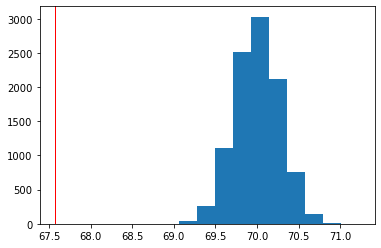

In [12]:
plt.hist(null_vals)
plt.axvline(sample_df['height'].mean(), color='r', linewidth=1);

In [13]:
# checking the sample_df height mean
sample_df['height'].mean()

67.56991579081225

Since our null is that the population mean is less than or equal to 70, we do have evidence to support this claim with our sample mean of 67.57. This suggests **not rejecting $H_{0}$**, our one-sided null hypothesis. If we had a null where we asked if the population mean was equal to 70, then we would reject this null in favor of an alternative that suggested the population mean was actually different from 70. 

#### Quiz: Simulating from the Null

In [14]:
sample_data = df.sample(200)

`1.` If you were interested in studying whether the average height for coffee drinkers is the same as for non-coffee drinkers, what would the null and alternative hypotheses be?

$H_{0}: \mu_{1} = \mu_{2} $

$H_{1}: \mu_{1} \neq \mu_{2} $

$\mu_{1}$: average height for all coffee drinkers

$\mu_{2}$: average height for all non-coffee drinkers

`2.` If you were interested in studying whether the average height for coffee drinkers is less than non-coffee drinkers, what would the null and alternative hypotheses be?  Write them in the cell below, and use your answer to answer the second quiz question below.

$H_{0}: \mu_{1} \geqslant \mu_{2} $

$H_{1}: \mu_{1} < \mu_{2} $

$\mu_{1}$: average height for all coffee drinkers

$\mu_{2}$: average height for all non-coffee drinkers

`3.` For 10,000 iterations: bootstrap the sample data, calculate the mean height for coffee drinkers and non-coffee drinkers, and calculate the difference in means for each sample.  You will want to have three arrays at the end of the iterations - one for each mean and one for the difference in means.  Use the results of your sampling distribution, to answer the third quiz question below.

In [15]:
diff_means, means_coff, means_nocoff = [], [], []

for _ in range(int(1e4)):
    bootsample = sample_data.sample(200, replace=True)
    coff_avg = bootsample.query('drinks_coffee == True')['height'].mean()
    nocoff_avg = bootsample.query('drinks_coffee == False')['height'].mean()
    # append the info
    means_coff.append(coff_avg)
    means_nocoff.append(nocoff_avg)
    diff_means.append(coff_avg - nocoff_avg)

In [16]:
# standard deviation for the difference in means
diff_means = np.array(diff_means)
np.std(diff_means)

0.46441474433403507

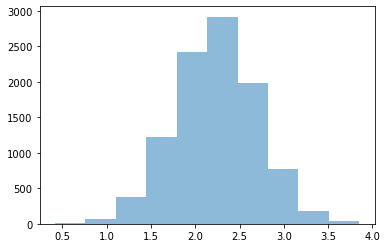

In [17]:
# checking the shape of the distribution 
plt.hist(diff_means, alpha = 0.5); # looks normal!

In [18]:
# standard deviation for the coffee drinkers' height means
means_coff = np.array(means_coff)
np.std(means_coff)

0.25429303380155116

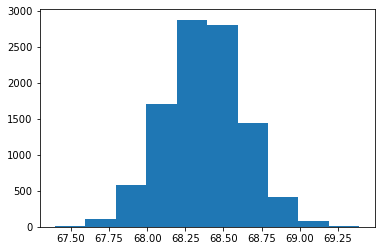

In [19]:
# checking the shape of the distribution 
plt.hist(means_coff);

In [20]:
# standard deviation for the non-coffee drinkers' height means
means_nocoff = np.array(means_nocoff)
np.std(means_nocoff)

0.38660853775728854

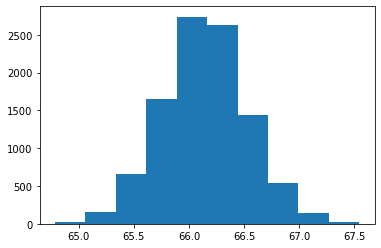

In [21]:
# checking the shape of the distribution 
plt.hist(means_nocoff);

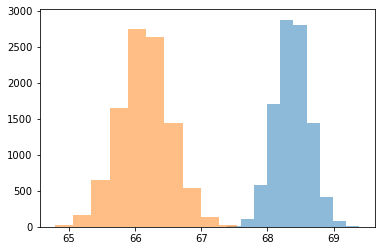

In [22]:
# alternatively, we could plot both on the same chart
plt.hist(means_coff, alpha = 0.5)
plt.hist(means_nocoff, alpha = 0.5); # they both look normal!

Notice the standard deviation with the difference in means is larger than either of the individual. It turns out that this value for the standard deviation of the difference is actually the square root of the sum of the variance of each of the individual sampling distributions. And the mean has a standard deviation of the original draws divided by the square root of the sample size taken. More on this [here](http://www.statsmodels.org/stable/glm.html) and [here](http://onlinestatbook.com/2/sampling_distributions/samp_dist_mean.html).

`4.` Now, use your observed sampling distribution for the difference in means and [the docs](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to simulate what you would expect the sampling distribution to be if the null hypothesis is true. You can do this be recentering your distribution at zero. Also, calculate the observed sample mean difference in `sample_data`. Use your solutions to answer the last questions in the quiz below.

$H_{0}: \mu_{1} - \mu_{2} = 0$

$H_{1}: \mu_{1} - \mu_{2} \neq 0$

> We would expect the sampling distribution to be normal by the Central Limit Theorem, and we know the standard deviation of the sampling distribution of the difference in means from the previous question, so we can use this to simulate draws from the sampling distribution under the null hypothesis.  If there is truly no difference, then the difference between the means should be zero.

In [23]:
null_vals = np.random.normal(0, np.std(diff_means), int(1e4))

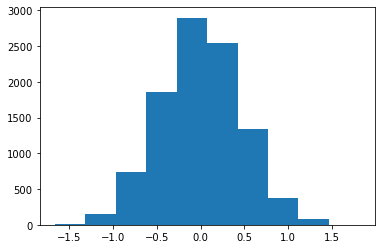

In [24]:
plt.hist(null_vals);

### What is a P-value Anyway?
The definition of a p-value is **the probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true**.

If your parameter is greater than some value in the alternative hypothesis, your shading will look like this to obtain your p-value:

<img src="support-files/12_Hypothesis-Testing/h1-greater-than.png" alt="h1-greater-than" width="400"/>

If your parameter is less than some value in the alternative hypothesis, your shading would look like this to obtain your p-value:

<img src="support-files/12_Hypothesis-Testing/h1-less-than.png" alt="h1-less-than" width="400"/>

If your parameter is not equal to some value in the alternative hypothesis, your shading would look like this to obtain your p-value:

<img src="support-files/12_Hypothesis-Testing/h1-not-equal-to.png" alt="h1-not-equal-to" width="400"/>

#### Calculating P-value

In [25]:
# create a sample from our data
sample_df = df.sample(150)

In [26]:
# create our bootstrap sample
bootsample = sample_df.sample(150, replace=True)

In [27]:
# bootstrap from the sample
means = []
for _ in range(int(1e4)):
    bootsample = sample_df.sample(150, replace=True)
    means.append(bootsample['height'].mean())

In [28]:
# standard deviation
np.std(means)

0.2532075226095114

In [29]:
# create a random sample for the null values
null_vals = np.random.normal(70, np.std(means), int(1e4))

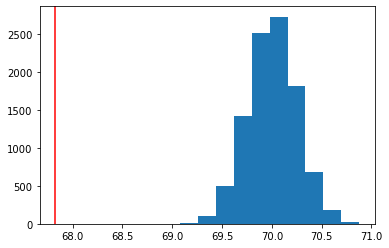

In [30]:
# plot the null values
plt.hist(null_vals)
plt.axvline(sample_df['height'].mean(), color='r');

In [31]:
# find the sample mean
sample_mean = sample_df['height'].mean()
sample_mean

67.8217119009756

Scenario:

$ H_{0}: \mu \leqslant 70 $

$ H_{1}: \mu > 70 $

Consider $\mu$ as the average height of all individuals in the dataset. Both coffee drinks and non-coffee drinkers

In [32]:
# calculate the p-value
(null_vals > sample_mean).mean()

1.0

The result above suggests that we should stay with the mean being equal to or less than 70. In other words, we should **not reject our null hypothesis ($H_{0}$)**.

New scenario

$H_0: \mu \geqslant 70$

$H_1: \mu < 70$

In [33]:
(null_vals < sample_mean).mean()

0.0

This result suggest we **reject the null hypothesis ($H_{0}$)** in favor of the alternative, which suggests that the population mean is indeed less than 70.

New scenario

$H_0: \mu = 70$

$H_1: \mu \neq 70$

In [34]:
null_mean = 70
(null_vals < sample_mean).mean() + (null_vals > null_mean + (null_mean - sample_mean)).mean()

0.0

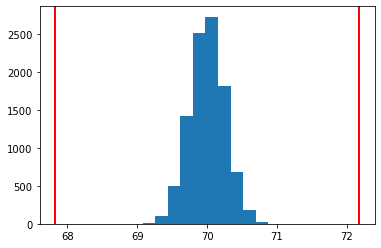

In [35]:
low = sample_mean
high = null_mean + (null_mean - sample_mean)

plt.hist(null_vals)
plt.axvline(low, color='r', linewidth=2)
plt.axvline(high, color='r', linewidth=2);

There are essentially no data points from our null hypothesis that fall outside of this region. Again, we would have evidence to suggest that the null hypothesized value **did not** generate our sample statistic. We thus **reject the null hypothesis ($H_{0}$)**.

#### Quiz: What is a p-value anyway?

1. Consider you have implemented a new program in the office to improve company morale. You measure employee morale for each employee via an assessment before and after the program. You want to see if the program was successful.

$H_{0}: \mu_{new} \leqslant \mu_{old} $

$H_{1}: \mu_{new} > \mu_{old} $

- Deciding there was no change in morale, but there actually was an increase: `TYPE II ERROR`
- Deciding the program increased morale, but it actually didn't: `TYPE I ERROR`
- There was no change in the average morale of the company: `NULL HYPOTHESIS`
- The new program on average increased morale: `ALTERNATIVE HYPOTHESIS`
- The probability of the observed change in average morale occurring or an average change even more in favor of an increase in morale given there was actually no change in morale: `p-value`

2. 


$ H_{0}: \mu \geqslant 5 $

$ H_{1}: \mu < 5 $

$\bar{x} = 10 $

In this case, we would expect the p-value to be greater than 50%.

Because 10 is to the right of the null mean of 5, and the alternative is less than, we shade to the left - this would shade more than half of the distribution. Imagine marking the center of the distribution at 5 and where 10 would be. Then you mark the 10, and shade according to the alternative (less than).

Since the population is much greater than 5 (at 10), this suggests we should stick with the null. It is actually always the case that when your p-value is large you will end up staying with the null hypothesis as your choice.

3. 


$ H_{0}: \mu \leqslant 5 $

$ H_{1}: \mu > 5 $

$\bar{x} = 10 $

In this case, we would expect the p-value to be less than 50%.

Because 10 is to the right of the null mean of 5, and the alternative is greater than, we shade to the right - this would shade less than half of the distribution. Imagine marking the center of the distribution at 5 and where 10 would be. Then you mark the 10, and shade according to the alternative (greater than).

Since the population mean is much greater than 5 (at 10), this suggests we should move to the alternative. It is actually always the case that when your p-value is small you will end up moving to the alternative hypothesis.

### Connecting Errors and P-Values

The p-value is the probability of getting our statistic or a more extreme value if the null is true.

Therefore, small p-values suggest our null is not true. Rather, our statistic is likely to have come from a different distribution than the null.

When the p-value is large, we have evidence that our statistic was likely to come from the null hypothesis. Therefore, we do not have evidence to reject the null.

By comparing our p-value to our type I error threshold ($\alpha$), we can make our decision about which hypothesis we will choose.

$ pvalue \leqslant \alpha $ ⇒ Reject $H_0 $

$ pvalue > \alpha ⇒ $ Fail to Reject $H_0 $

### Conclusions in Hypothesis Testing

The word **accept** is one that is **avoided** when making statements regarding the null and alternative. You are not stating that one of the hypotheses is true. Rather, you are making a decision based on the likelihood of your data coming from the null hypothesis concerning your type I error threshold.

Therefore, the wording used in conclusions of hypothesis testing includes: **We reject the null hypothesis**, or **We fail to reject the null hypothesis**. This lends itself to the idea that you start with the null hypothesis true by default, and "choosing" the null at the end of the test would have been the choice even if no data were collected.

#### Quiz: Drawing Conclusions
Here are two datasets that represent two of the examples you have seen in this lesson.  

One dataset is based on the parachute example, and the second is based on the judicial example. Neither of these datasets is based on real people.

In [36]:
jud_data = pd.read_csv('support-files/12_Hypothesis-Testing/judicial_dataset_predictions.csv')
par_data = pd.read_csv('support-files/12_Hypothesis-Testing/parachute_dataset.csv')

`1.` Using the **jud_data**, find the proportion of errors for the dataset, and furthermore, the percentage of errors of each type.  Use the results to answer the questions in quiz 1 below.  

> **Hint for quiz:** an error is any time the prediction doesn't match an actual value.  Additionally, there are Type I and Type II errors to think about.  We also know we can minimize one type of error by maximizing the other type of error.  If we predict all individuals as innocent, how many of the guilty are incorrectly labeled?  Similarly, if we predict all individuals as guilty, how many of the innocent are incorrectly labeled?

In [37]:
jud_data.head()

,defendant_id,actual,predicted
0,22574,innocent,innocent
1,35637,innocent,innocent
2,39919,innocent,innocent
3,29610,guilty,guilty
4,38273,innocent,innocent


In [38]:
jud_data['actual'].unique()

array(['innocent', 'guilty'], dtype=object)

In [39]:
jud_data['actual_binary'] = jud_data['actual'].apply(lambda x: 0 if x == "innocent" else 1)
jud_data.tail()

,defendant_id,actual,predicted,actual_binary
7278,20858,innocent,innocent,0
7279,31359,guilty,guilty,1
7280,32703,guilty,guilty,1
7281,23146,innocent,innocent,0
7282,28112,innocent,innocent,0


In [40]:
jud_data['predicted_binary'] = jud_data['predicted'].apply(lambda x: 0 if x == "innocent" else 1)
jud_data.tail()

,defendant_id,actual,predicted,actual_binary,predicted_binary
7278,20858,innocent,innocent,0,0
7279,31359,guilty,guilty,1,1
7280,32703,guilty,guilty,1,1
7281,23146,innocent,innocent,0,0
7282,28112,innocent,innocent,0,0


In [41]:
# df containing the type I errors, that is, choosing H1 when H0 is true (predicted = 1 and actual = 0)
jud_type1 = jud_data.query('actual_binary == 0 and predicted_binary == 1')
jud_type1.head()

,defendant_id,actual,predicted,actual_binary,predicted_binary
1744,24421,innocent,guilty,0,1
2457,24188,innocent,guilty,0,1
2877,29157,innocent,guilty,0,1
3142,23764,innocent,guilty,0,1
3673,20545,innocent,guilty,0,1


In [42]:
# checking to see if I actually got only the actual innocents (0)
jud_type1['actual_binary'].unique()

array([0], dtype=int64)

In [43]:
# checking to see if I actually got only the predicted guilty (1)
jud_type1['predicted_binary'].unique()

array([1], dtype=int64)

In [44]:
# total number of rows in the dataset
jud_data.shape[0]

7283

In [45]:
# number of type 1 errors in the dataset
jud_type1.shape[0]

11

In [46]:
# proportion of type 1 errors
prop_jud_type1 = jud_type1.shape[0] / jud_data.shape[0]
print(f'The proportion of Type 1 errors is {prop_jud_type1*100:.2f}%.')

The proportion of Type 1 errors (alpha) is 0.15%.


In [47]:
# another possibility for the type 1 errors
jud_data.query("actual == 'innocent' and predicted == 'guilty'").count()[0]/jud_data.shape[0] # Type 1 errors

0.001510366607167376

In [48]:
# df containing the type II errors, that is, choosing H0 when H1 is true (predicted = 0 and actual = 1)
jud_type2 = jud_data.query('actual_binary == 1 and predicted_binary == 0')
jud_type2.head()

,defendant_id,actual,predicted,actual_binary,predicted_binary
42,29430,guilty,innocent,1,0
44,29092,guilty,innocent,1,0
49,29012,guilty,innocent,1,0
56,26079,guilty,innocent,1,0
71,25523,guilty,innocent,1,0


In [49]:
# number of type 2 errors in the dataset
jud_type2.shape[0]

296

In [50]:
# proportion of type 1 errors
prop_jud_type2 = jud_type2.shape[0] / jud_data.shape[0]
print(f'The proportion of Type 2 errors is {prop_jud_type2*100:.2f}%.')

The proportion of Type 2 errors (beta) is 4.06%.


In [51]:
# another possibility for the type 2 errors
jud_data.query("actual == 'guilty' and predicted == 'innocent'").count()[0]/jud_data.shape[0] # Type 2 errors

0.04064259233832212

In [52]:
# total number of errors
jud_type1.shape[0] + jud_type2.shape[0]

307

In [53]:
# total percentage of errors
prop_jud_errors = (jud_type1.shape[0] + jud_type2.shape[0]) / jud_data.shape[0]
print(f'The total percentage of errors is {prop_jud_errors*100:.2f}%.')

The total percentage of errors is 4.22%.


In [54]:
# another possibility for the proportion of errors
prop_jud_errors = jud_data.query('actual != predicted').shape[0] / jud_data.shape[0]
print(f'The total percentage of errors is {prop_jud_errors*100:.2f}%.')

The total percentage of errors is 4.22%.


In [55]:
# Type 1 error: choosing H1 when H0 is true (finding an innocent person to be guilty)
# prediction = guilty, actual = innocent
# If we predict everyone to be guilty, then every innocent person represents a type 1 error

scenario_type1 = jud_data.query('actual == "innocent"').shape[0] / jud_data.shape[0]
print(f'If everyone was predicted to be guilty, the percentage of Type I Errors made would be {scenario_type1*100:.2f}%.')

If everyone was predicted to be guilty, the percentage of Type I Errors made would be 45.16%.


In [56]:
# Type 2 error: choosing H0 when H1 is true (finding a guilty person to be innocent)
# prediction = innocent, actual = guilty
# since the scenario here is predicting everyone is guilty, then no one is predicted innocent
# therefore, there is no type 2 errors in this scenario
scenario_type2 = 0
print(f'If everyone was predicted to be guilty, the percentage of Type II Errors made would be {scenario_type2*100}%.')

If everyone was predicted to be guilty, the percentage of Type II Errors made would be 0%.


In [57]:
# to recap:
print(f'1. The total percentage of errors is {prop_jud_errors*100:.2f}%.')
print(f'2. The proportion of Type 1 errors is {prop_jud_type1*100:.2f}%.')
print(f'3. The proportion of Type 2 errors is {prop_jud_type2*100:.2f}%.')
print(f'4. If everyone was predicted to be guilty, the percentage of Type I Errors made would be {scenario_type1*100:.2f}%.')
print(f'5. If everyone was predicted to be guilty, the percentage of Type II Errors made would be {scenario_type2*100}%.')

1. The total percentage of errors is 4.22%.
2. The proportion of Type 1 errors (alpha) is 0.15%.
3. The proportion of Type 2 errors (beta) is 4.06%.
4. If everyone was predicted to be guilty, the percentage of Type I Errors made would be 45.16%.
5. If everyone was predicted to be guilty, the percentage of Type II Errors made would be 0%.


`2.` Using the **par_data**, find the proportion of errors for the dataset, and furthermore, the percentage of errors of each type.  Use the results to answer the questions in quiz 2 below.

These should be very similar operations to those you performed in the previous question.

In [58]:
par_data.head()

,parachute_id,actual,predicted
0,3956,opens,opens
1,2147,opens,opens
2,2024,opens,opens
3,8325,opens,opens
4,6598,opens,opens


In [59]:
par_data['actual'].unique()

array(['opens', 'fails'], dtype=object)

In [60]:
# type 1 errors
# choosing H1 when H0 is true
# prediction = opens, actual = fails
prop_par_type1 = par_data.query('actual == "fails" and predicted == "opens"').count()[0] / par_data.shape[0]
print(f'The proportion of Type 1 errors is {prop_par_type1:.5f}.')

The proportion of Type 1 errors (alpha) is 0.00017.


In [61]:
# type 2 errors
# choosing H0 when H1 is true 
# prediction = fails, actual = opens
prop_par_type2 = par_data.query('actual == "opens" and predicted == "fails"').count()[0] / par_data.shape[0]
print(f'The proportion of Type 2 errors is {prop_par_type2:.5f}.')

The proportion of Type 2 errors (beta) is 0.03980.


In [62]:
# total proportion of errors
# way 1
prop_par_errors = par_data.query('actual == "fails" and predicted == "opens" or actual == "opens" and predicted == "fails"').count()[0] / par_data.shape[0]
print(f'The total percentage of errors is {prop_par_errors:.5f}.')

The total percentage of errors is 0.03997.


In [63]:
# total proportion of errors
# way 2
prop_par_errors = prop_par_type1 + prop_par_type2
print(f'The total percentage of errors is {prop_par_errors:.5f}.')

The total percentage of errors is 0.03997.


In [64]:
# If every parachute was predicted to not open, what is the proportion of type I errors made?
# Type 1 error: choosing H1 when H0 is true
# Prediction = opens, actual = fails 

# If every parachute was predicted to not open, then none of them was predicted to open, 
# which was what we needed to have a type 1 error. Therefore:

scenario_par_type1 = 0
print(f'If every parachute was predicted to not open, the proportion of Type I Errors made would be {scenario_par_type1}.')

If every parachute was predicted to not open, the proportion of Type I Errors made would be 0.


In [65]:
# If every parachute was predicted to not open, what is the proportion of Type II Errors made?  
# Type 2 error: choosing H0 when H1 is true
# Prediction = fails, actual = opens

# if every parachute is predicted to not open, then every parachute that actually opens is considered a type 2 error
scenario_par_type2 = par_data.query('actual == "opens"').count()[0] / par_data.shape[0]
print(f'If every parachute was predicted to not open, the proportion of Type II Errors made would be {scenario_par_type2:.5f}.')

If every parachute was predicted to not open, the proportion of Type II Errors made would be 0.99177.


In [67]:
# to recap:
print(f'1. The total percentage of errors is {prop_par_errors:.5f}.')
print(f'2. The proportion of Type 1 errors is {prop_par_type1:.5f}.')
print(f'3. The proportion of Type 2 errors is {prop_par_type2:.5f}.')
print(f'4. If every parachute was predicted to not open, the proportion of Type I Errors made would be {scenario_par_type1}.')
print(f'5. If every parachute was predicted to not open, the proportion of Type II Errors made would be {scenario_par_type2:.5f}.')

1. The total percentage of errors is 0.03997.
2. The proportion of Type 1 errors is 0.00017.
3. The proportion of Type 2 errors is 0.03980.
4. If every parachute was predicted to not open, the proportion of Type I Errors made would be 0.
5. If every parachute was predicted to not open, the proportion of Type II Errors made would be 0.99177.


### Other Things to Consider

#### 1. Impact of large sample size
**Hypothesis Testing vs. Machine Learning**

With large sample sizes, hypothesis testing leads to even the smallest of findings as **statistically significant**. However, these findings might not be practically significant at all.

For example, imagine you find that **statistically** more people prefer beverage 1 to beverage 2 in a study of more than one million people. Based on this, you decide to open a shop to sell beverage 1. You then find out that beverage 1 is only more popular than beverage 2 by 0.0002% (but a statistically significant amount with your large sample size). Practically, maybe you should have opened a store that sold both.

Hypothesis testing takes an aggregate approach towards the conclusions made based on data, as these tests aim to understand population parameters (aggregate population values).

Alternatively, machine learning techniques take an individual approach towards making conclusions, as they attempt to predict an outcome for each specific data point.

In the final lessons of this class, you will learn about two of the most fundamental machine learning approaches used in practice: **linear** and **logistic** regression.

#### 2. What if we test more than once?
When performing more than one hypothesis test, your type I error compounds. To correct this, a common technique is called the **Bonferroni** correction. This correction is **very conservative** but says that your new type I error rate should be the error rate you actually want to be divided by the number of tests you perform.

Therefore, if you would like to hold a type I error rate of 1% for each of the 20 hypothesis tests, the Bonferroni corrected rate would be 0.01/20 = 0.0005. This would be the new rate you should use to compare the p-value for each of the 20 tests to make your decision.

**Other Techniques**
Additional techniques to protect against compounding type I errors include:

1. [Tukey correction](http://www.itl.nist.gov/div898/handbook/prc/section4/prc471.htm)
2. [Q-values](http://www.nonlinear.com/support/progenesis/comet/faq/v2.0/pq-values.aspx)

#### Quiz: The Impact of Large Sample Sizes

When we increase our sample size, even the smallest of differences may seem significant.  

To illustrate this point, work through this notebook.

In [70]:
np.random.seed(42)
full_data = pd.read_csv('support-files/12_Hypothesis-Testing/coffee_dataset.csv')

`1.` In this case, imagine we are interested in testing if the mean height of all individuals in `full_data` is equal to 67.60 inches or **different** than 67.60.  First, state the null and alternative hypotheses for these cases in the cell below. 

$$ H_{0}: \mu = 67.60 $$

$$ H_{1}: \mu \neq 67.60 $$

Consider $ \mu $ as the mean height of everyone in the population.

`2.` Find:
* What is the population mean height?  
* What is the standard deviation of the population heights?  
* Create a sample set of data using the code below.  
* What is the sample mean height?  Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram. 
* What is the standard deviation of the sampling distribution of the mean of five draws? 

In [72]:
# what is the population mean height?
mean_height = full_data['height'].mean()
mean_height

67.59748697307937

In [98]:
# what is the standard deviation of the population heights?
np.std(full_data['height'])

3.1189087116821472

In [99]:
# create a sample set of data using the code below.
sample1 = full_data.sample(5)
sample1['height'].mean()

68.18327503922777

In [112]:
# what is the sample mean height?
# simulate the sampling distribution for the mean of five values to see the shape and plot a histogram. 
means = []

for _ in range(int(1e4)):
    sample_of_5 = sample1.sample(5, replace=True)
    means.append(sample_of_5['height'].mean())
    
means = np.array(means)

In [114]:
sample_mean = means.mean()
sample_mean

68.18057796289816

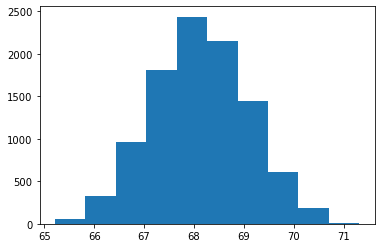

In [101]:
# plot a histogram of the sample mean
plt.hist(means);

In [102]:
# what is the standard deviation of the sampling distribution of the mean of five draws? 
np.std(means)

0.9491953536151924

`3.` Using the null and alternative hypotheses set up in question 1 and the results of your sampling distribution in question 2, simulate the mean values you would expect from the null hypothesis.  Use these simulated values to determine a p-value to make a decision about your null and alternative hypotheses.  Check your solution using **quiz 3** and **quiz 4** below.

**Hint:** Use the numpy documentation [here](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to assist with your solution.